In [1]:
import pandas as pd
import numpy as np

df_denof = pd.read_csv('../train_public/1h/L03.B02_1H.csv')
df_weather = pd.read_csv('D:/payday/train_public/weather/L03_weather_train.csv')

In [2]:
print(df_weather.columns)
print(df_denof.columns)

Index(['timestamp', 'air_temperature_at_2m(deg_C)',
       'relative_humidity_at_2m(%)', 'direct_solar_radiation(W/m^2)',
       'diffuse_solar_radiation(W/m^2)', 'wind_speed_at_10m(km/h)',
       'wind_direction_at_10m(deg)'],
      dtype='object')
Index(['timestamp', 'main_meter(kW)'], dtype='object')


In [3]:
print(df_weather.dtypes)
print(df_denof.dtypes)

timestamp                          object
air_temperature_at_2m(deg_C)      float64
relative_humidity_at_2m(%)        float64
direct_solar_radiation(W/m^2)     float64
diffuse_solar_radiation(W/m^2)    float64
wind_speed_at_10m(km/h)           float64
wind_direction_at_10m(deg)        float64
dtype: object
timestamp          object
main_meter(kW)    float64
dtype: object


In [4]:
df = pd.merge(df_denof,df_weather, on= 'timestamp',how = 'left')

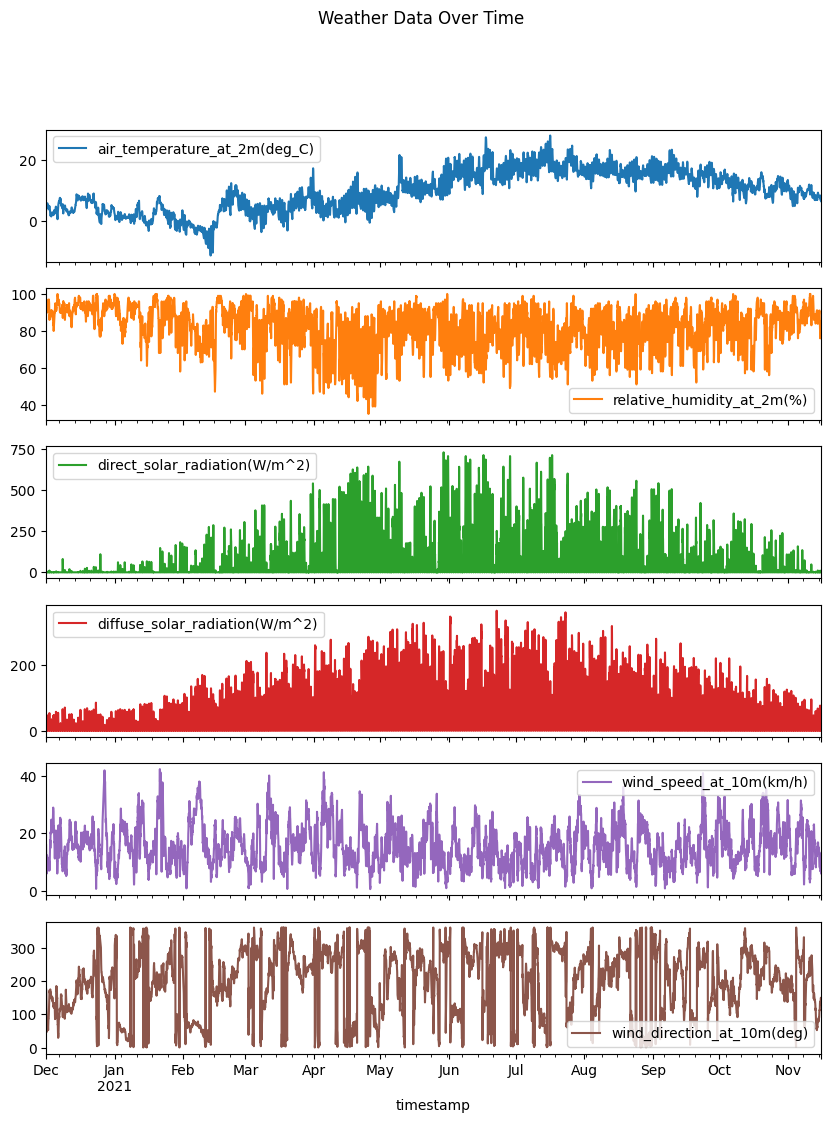

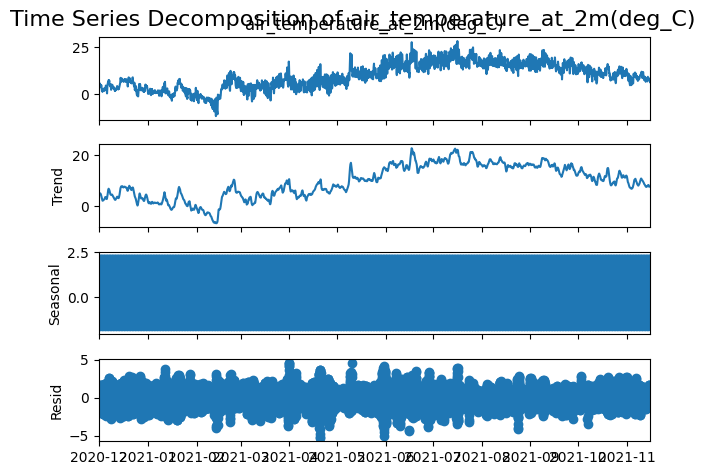

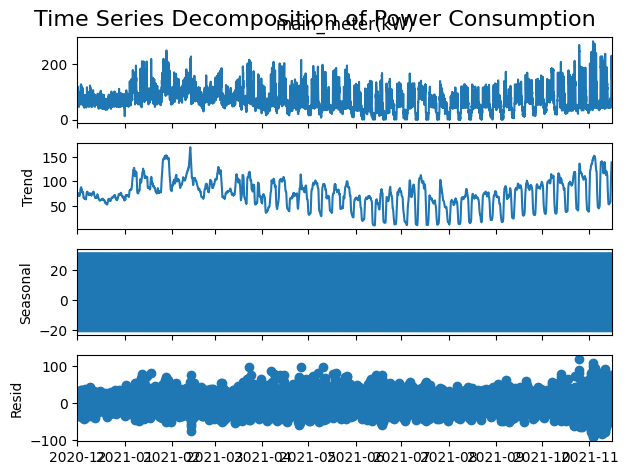

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert timestamp to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])
df_denof['timestamp'] = pd.to_datetime(df_denof['timestamp'])

# Set timestamp as index
df_weather.set_index('timestamp', inplace=True)
df_denof.set_index('timestamp', inplace=True)

# Handle missing values by filling with zeros
df_weather.fillna(0, inplace=True)
df_denof.fillna(0, inplace=True)

# Plot weather variables over time
df_weather.plot(subplots=True, figsize=(10, 12), title='Weather Data Over Time')
plt.show()

# Decompose time series for weather data

result = seasonal_decompose(df_weather['air_temperature_at_2m(deg_C)'], model='additive', period=24)
result.plot()
plt.suptitle(f'Time Series Decomposition of air_temperature_at_2m(deg_C)', fontsize=16)
plt.show()

# Decompose time series for power consumption data
result_power = seasonal_decompose(df_denof['main_meter(kW)'], model='additive', period=24)
result_power.plot()
plt.suptitle('Time Series Decomposition of Power Consumption', fontsize=16)
plt.show()


In [6]:
df.rename(columns={'main_meter(kW)':'power'},inplace=True)

In [7]:
df = df.reset_index()

In [8]:
df.rename(columns = {'air_temperature_at_2m(deg_C)': 'temperature'})

,index,timestamp,power,temperature,relative_humidity_at_2m(%),direct_solar_radiation(W/m^2),diffuse_solar_radiation(W/m^2),wind_speed_at_10m(km/h),wind_direction_at_10m(deg)
0,0,2020-12-01 00:00:00+00:00,69.778595,3.444376,97.016089,0.026658,-0.054859,15.924282,175.974536
1,1,2020-12-01 01:00:00+00:00,52.449440,3.662187,96.964139,-0.022419,0.039787,13.008325,174.044967
2,2,2020-12-01 02:00:00+00:00,72.574860,3.849796,97.042752,0.018184,-0.019089,9.631573,167.017767
3,3,2020-12-01 03:00:00+00:00,67.813957,4.047407,97.044695,0.054901,-0.016765,6.825520,148.045236
4,4,2020-12-01 04:00:00+00:00,65.743805,4.184971,97.035953,-0.022905,-0.012460,6.036958,114.996164
...,...,...,...,...,...,...,...,...,...
8395,8395,2021-11-15 19:00:00+00:00,148.864655,6.910766,81.985465,-0.036131,0.038543,6.930305,137.044424
8396,8396,2021-11-15 20:00:00+00:00,151.322693,6.753975,81.976869,0.015393,0.038366,7.456723,144.981432
8397,8397,2021-11-15 21:00:00+00:00,120.674629,6.582176,82.985219,0.014573,0.001191,7.893027,149.998625
8398,8398,2021-11-15 22:00:00+00:00,113.046677,6.631711,83.958208,-0.020878,-0.013877,6.360064,142.022950


In [10]:
df.columns

Index(['index', 'power', 'air_temperature_at_2m(deg_C)',
       'relative_humidity_at_2m(%)', 'direct_solar_radiation(W/m^2)',
       'diffuse_solar_radiation(W/m^2)', 'wind_speed_at_10m(km/h)',
       'wind_direction_at_10m(deg)', 'detrended_power'],
      dtype='object')

In [12]:
df.rename(columns = {'index':'timestamp'},inplace = True)

This temperature data provides valuable information that can help isolate the heating component of the power consumption. Here's what we can do with this additional information:

1. Correlation analysis:
   - Calculate the correlation between temperature and power consumption. A strong negative correlation would indicate that as temperature decreases, power consumption increases, likely due to heating.

2. Heating degree days (HDD):
   - Calculate HDDs using a base temperature (typically 18°C or 65°F). This gives a measure of how much heating is needed.
   - Compare HDDs with power consumption to see the relationship.

3. Threshold identification:
   - Identify the temperature threshold below which heating is likely to be used in the building.
   - Analyze power consumption patterns when temperature is below this threshold.

4. Seasonal comparison:
   - Compare power consumption during colder months (lower temperatures) with warmer months to estimate the additional load due to heating.

5. Regression analysis:
   - Perform a regression analysis with temperature as the independent variable and power consumption as the dependent variable.
   - The slope of this relationship during colder temperatures can indicate the heating load.

6. Time-lagged analysis:
   - Consider time lags between temperature changes and power consumption changes, as buildings may take time to respond to external temperature fluctuations.

7. Weekday vs. weekend analysis:
   - Separate the data into weekdays and weekends to account for occupancy differences.
   - Analyze how temperature affects power consumption differently on occupied vs. unoccupied days.

8. Baseload identification:
   - Use the warmest periods to estimate the baseload (non-heating power consumption).
   - Subtract this baseload from total consumption during colder periods to estimate heating load.

9. Change point analysis:
   - Identify the temperature at which power consumption starts to increase significantly, indicating the onset of heating usage.

10. Machine learning models:
    - Develop models (e.g., random forests, neural networks) that can predict power consumption based on temperature and other relevant factors.
    - Use feature importance to understand the impact of temperature on consumption.

By combining these approaches with the time series decomposition you've already performed, you should be able to more accurately estimate the heating component of the total power consumption. The key is to look for patterns where power consumption increases as temperature decreases, especially during typically occupied hours of the building.

In [17]:
correlation = df['power'].corr(df['air_temperature_at_2m(deg_C)'])

print("Correlation between 'power' and 'air_temperature_at_2m(deg_C)':", correlation)


Correlation between 'power' and 'air_temperature_at_2m(deg_C)': -0.29826071329978465


<Axes: >

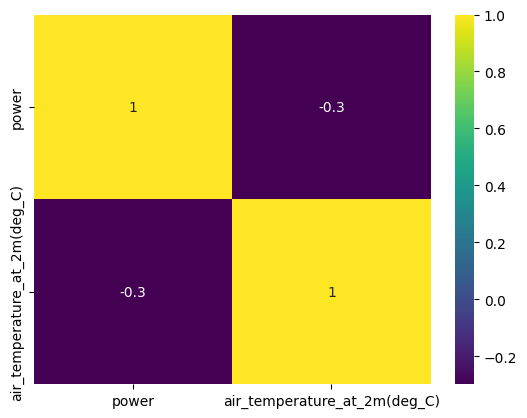

In [24]:
import seaborn as sns

m = df[['power','air_temperature_at_2m(deg_C)']].corr()

sns.heatmap(m,cmap = 'viridis',annot=True)

In [ ]:
import numpy as np

In [1]:
import pandas as pd

sim_den = pd.read_excel('../Denmark Results.xlsx')

In [2]:
sim_den

,Month,Day,Hour,Type,Lighting end-use energy,Miscellaneous equipment end-use energy,Heating end-use energy,Vent fan end-use energy,Total end-use energy,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,1,1,8,1.77717,3.0678,90.9461,3.30250,99.09360,NaN,NaN,NaN,NaN,NaN
1,1,1,2,8,1.77717,3.0678,0.0000,0.00000,4.84497,NaN,NaN,Total Annual,723016.336310,NaN
2,1,1,3,8,1.77717,3.0678,66.1568,2.40386,73.40560,NaN,NaN,NaN,90000.000000,NaN
3,1,1,4,8,1.77717,3.0678,60.5919,2.26674,67.70360,NaN,NaN,NaN,8.033515,kWh/sqft/year
4,1,1,5,8,1.77717,3.0678,32.0793,1.18188,38.10610,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,20,1,35.12880,15.2594,0.0000,0.00000,50.38820,NaN,NaN,NaN,NaN,NaN
8756,12,31,21,1,11.96630,10.2468,0.0000,0.00000,22.21310,NaN,NaN,NaN,NaN,NaN
8757,12,31,22,1,11.96630,10.2468,0.0000,0.00000,22.21310,NaN,NaN,NaN,NaN,NaN
8758,12,31,23,1,5.92391,10.2260,0.0000,0.00000,16.14990,NaN,NaN,NaN,NaN,NaN


In [3]:
sim_den.columns

Index(['Month', 'Day', 'Hour', 'Type', 'Lighting end-use energy',
       'Miscellaneous equipment end-use energy', 'Heating end-use energy',
       'Vent fan end-use energy', 'Total end-use energy', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [4]:
real_den = pd.read_csv('D:/payday/train_public/1h/L03.B02_1H.csv')

In [5]:
real_den

,timestamp,main_meter(kW)
0,2020-12-01 00:00:00+00:00,69.778595
1,2020-12-01 01:00:00+00:00,52.449440
2,2020-12-01 02:00:00+00:00,72.574860
3,2020-12-01 03:00:00+00:00,67.813957
4,2020-12-01 04:00:00+00:00,65.743805
...,...,...
8395,2021-11-15 19:00:00+00:00,148.864655
8396,2021-11-15 20:00:00+00:00,151.322693
8397,2021-11-15 21:00:00+00:00,120.674629
8398,2021-11-15 22:00:00+00:00,113.046677


In [6]:
# # Remove rows with NaN values from both simulated and real data
sim_den=sim_den.fillna(0)
real_den=real_den.fillna(0)


In [7]:
sim_den.columns

Index(['Month', 'Day', 'Hour', 'Type', 'Lighting end-use energy',
       'Miscellaneous equipment end-use energy', 'Heating end-use energy',
       'Vent fan end-use energy', 'Total end-use energy', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Simulated data columns
simulated_cols = ['Lighting end-use energy', 'Miscellaneous equipment end-use energy',
                  'Heating end-use energy', 'Vent fan end-use energy', 'Total end-use energy']

# Prepare training data
X_simulated = sim_den[['Total end-use energy']].values
y_simulated = sim_den[['Heating end-use energy']].values

8760 8760
Mean Squared Error: 1073.8117743824287


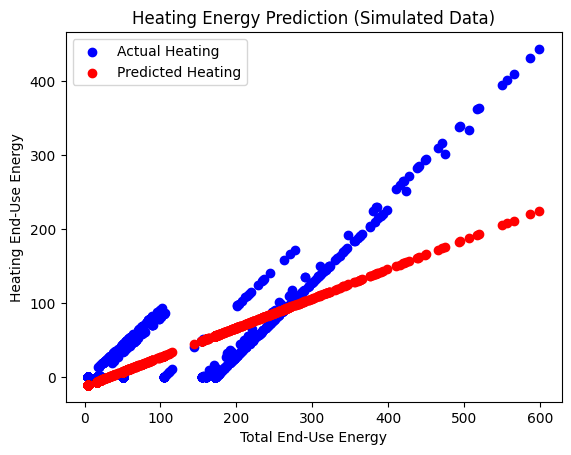

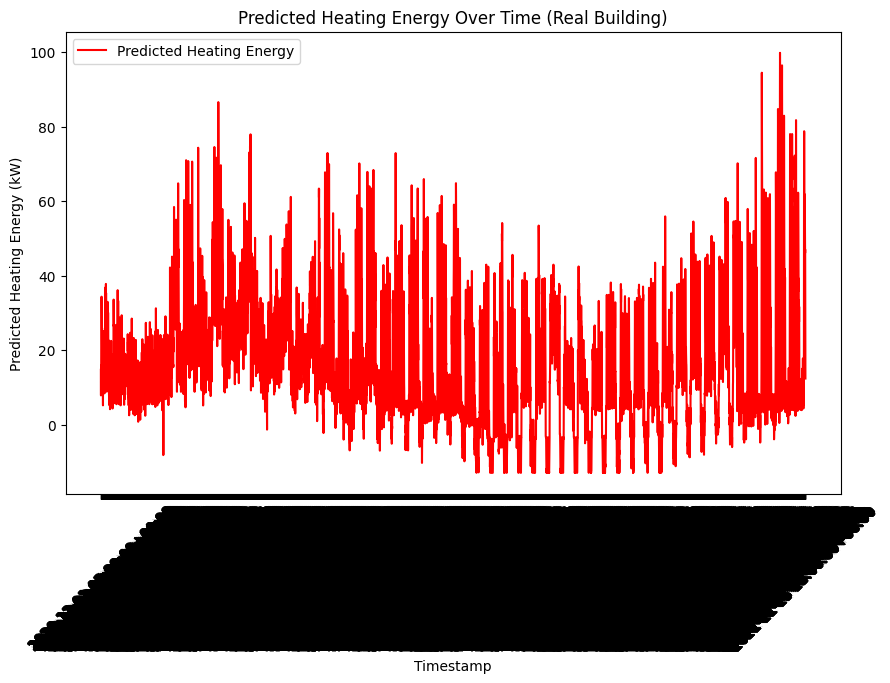

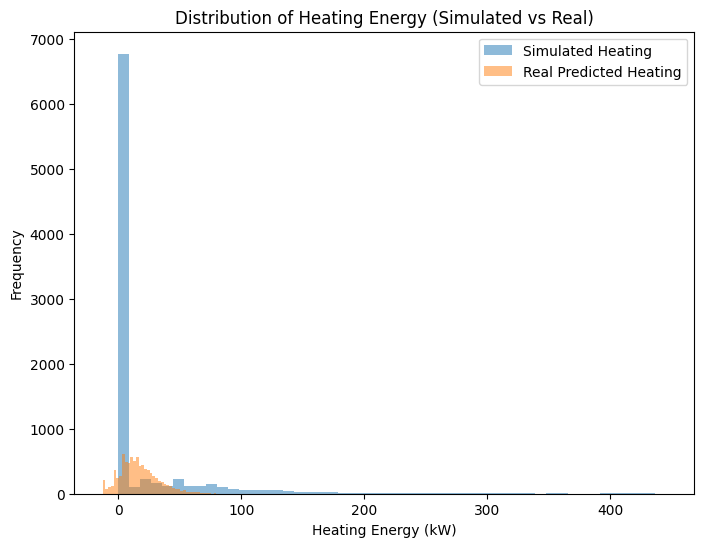

In [10]:




# Check the number of samples
num_samples = len(X_simulated)
num_samples2 = len(y_simulated)
print(num_samples,num_samples2)
# Train-test split for model validation
X_train, X_test, y_train, y_test = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the fit
plt.scatter(X_test, y_test, color='blue', label='Actual Heating')
plt.scatter(X_test, y_pred, color='red', label='Predicted Heating')
plt.title('Heating Energy Prediction (Simulated Data)')
plt.xlabel('Total End-Use Energy')
plt.ylabel('Heating End-Use Energy')
plt.legend()
plt.show()

# Apply the model to the real data
real_total_energy = real_den['main_meter(kW)'].values.reshape(-1, 1)

# Predict heating energy for the real data
real_heating_pred = model.predict(real_total_energy)

# Add predicted heating energy to the real data
real_den['Predicted Heating Energy (kW)'] = real_heating_pred

# Visualize the heating component over time
plt.figure(figsize=(10, 6))
plt.plot(real_den['timestamp'], real_den['Predicted Heating Energy (kW)'], label='Predicted Heating Energy', color='red')
plt.title('Predicted Heating Energy Over Time (Real Building)')
plt.xlabel('Timestamp')
plt.ylabel('Predicted Heating Energy (kW)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Compare the distribution of heating energy in real vs simulated
plt.figure(figsize=(8, 6))
plt.hist(sim_den['Heating end-use energy'], bins=50, alpha=0.5, label='Simulated Heating')
plt.hist(real_den['Predicted Heating Energy (kW)'], bins=50, alpha=0.5, label='Real Predicted Heating')
plt.title('Distribution of Heating Energy (Simulated vs Real)')
plt.xlabel('Heating Energy (kW)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [11]:
real_den

,timestamp,main_meter(kW),Predicted Heating Energy (kW)
0,2020-12-01 00:00:00+00:00,69.778595,14.759290
1,2020-12-01 01:00:00+00:00,52.449440,7.887176
2,2020-12-01 02:00:00+00:00,72.574860,15.868187
3,2020-12-01 03:00:00+00:00,67.813957,13.980186
4,2020-12-01 04:00:00+00:00,65.743805,13.159239
...,...,...,...
8395,2021-11-15 19:00:00+00:00,148.864655,46.121949
8396,2021-11-15 20:00:00+00:00,151.322693,47.096717
8397,2021-11-15 21:00:00+00:00,120.674629,34.942808
8398,2021-11-15 22:00:00+00:00,113.046677,31.917840


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h, df_bo1min15, and df_weather are your DataFrames and already loaded
df_1h = real_den
# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])

df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'],[0]*len(one_day_hourly['main_meter(kW)']),color = 'green')
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
    
    axes[i].set_ylabel('Main Meter (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot weather data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
    ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:

    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.title('Denmark - Office')
plt.show()

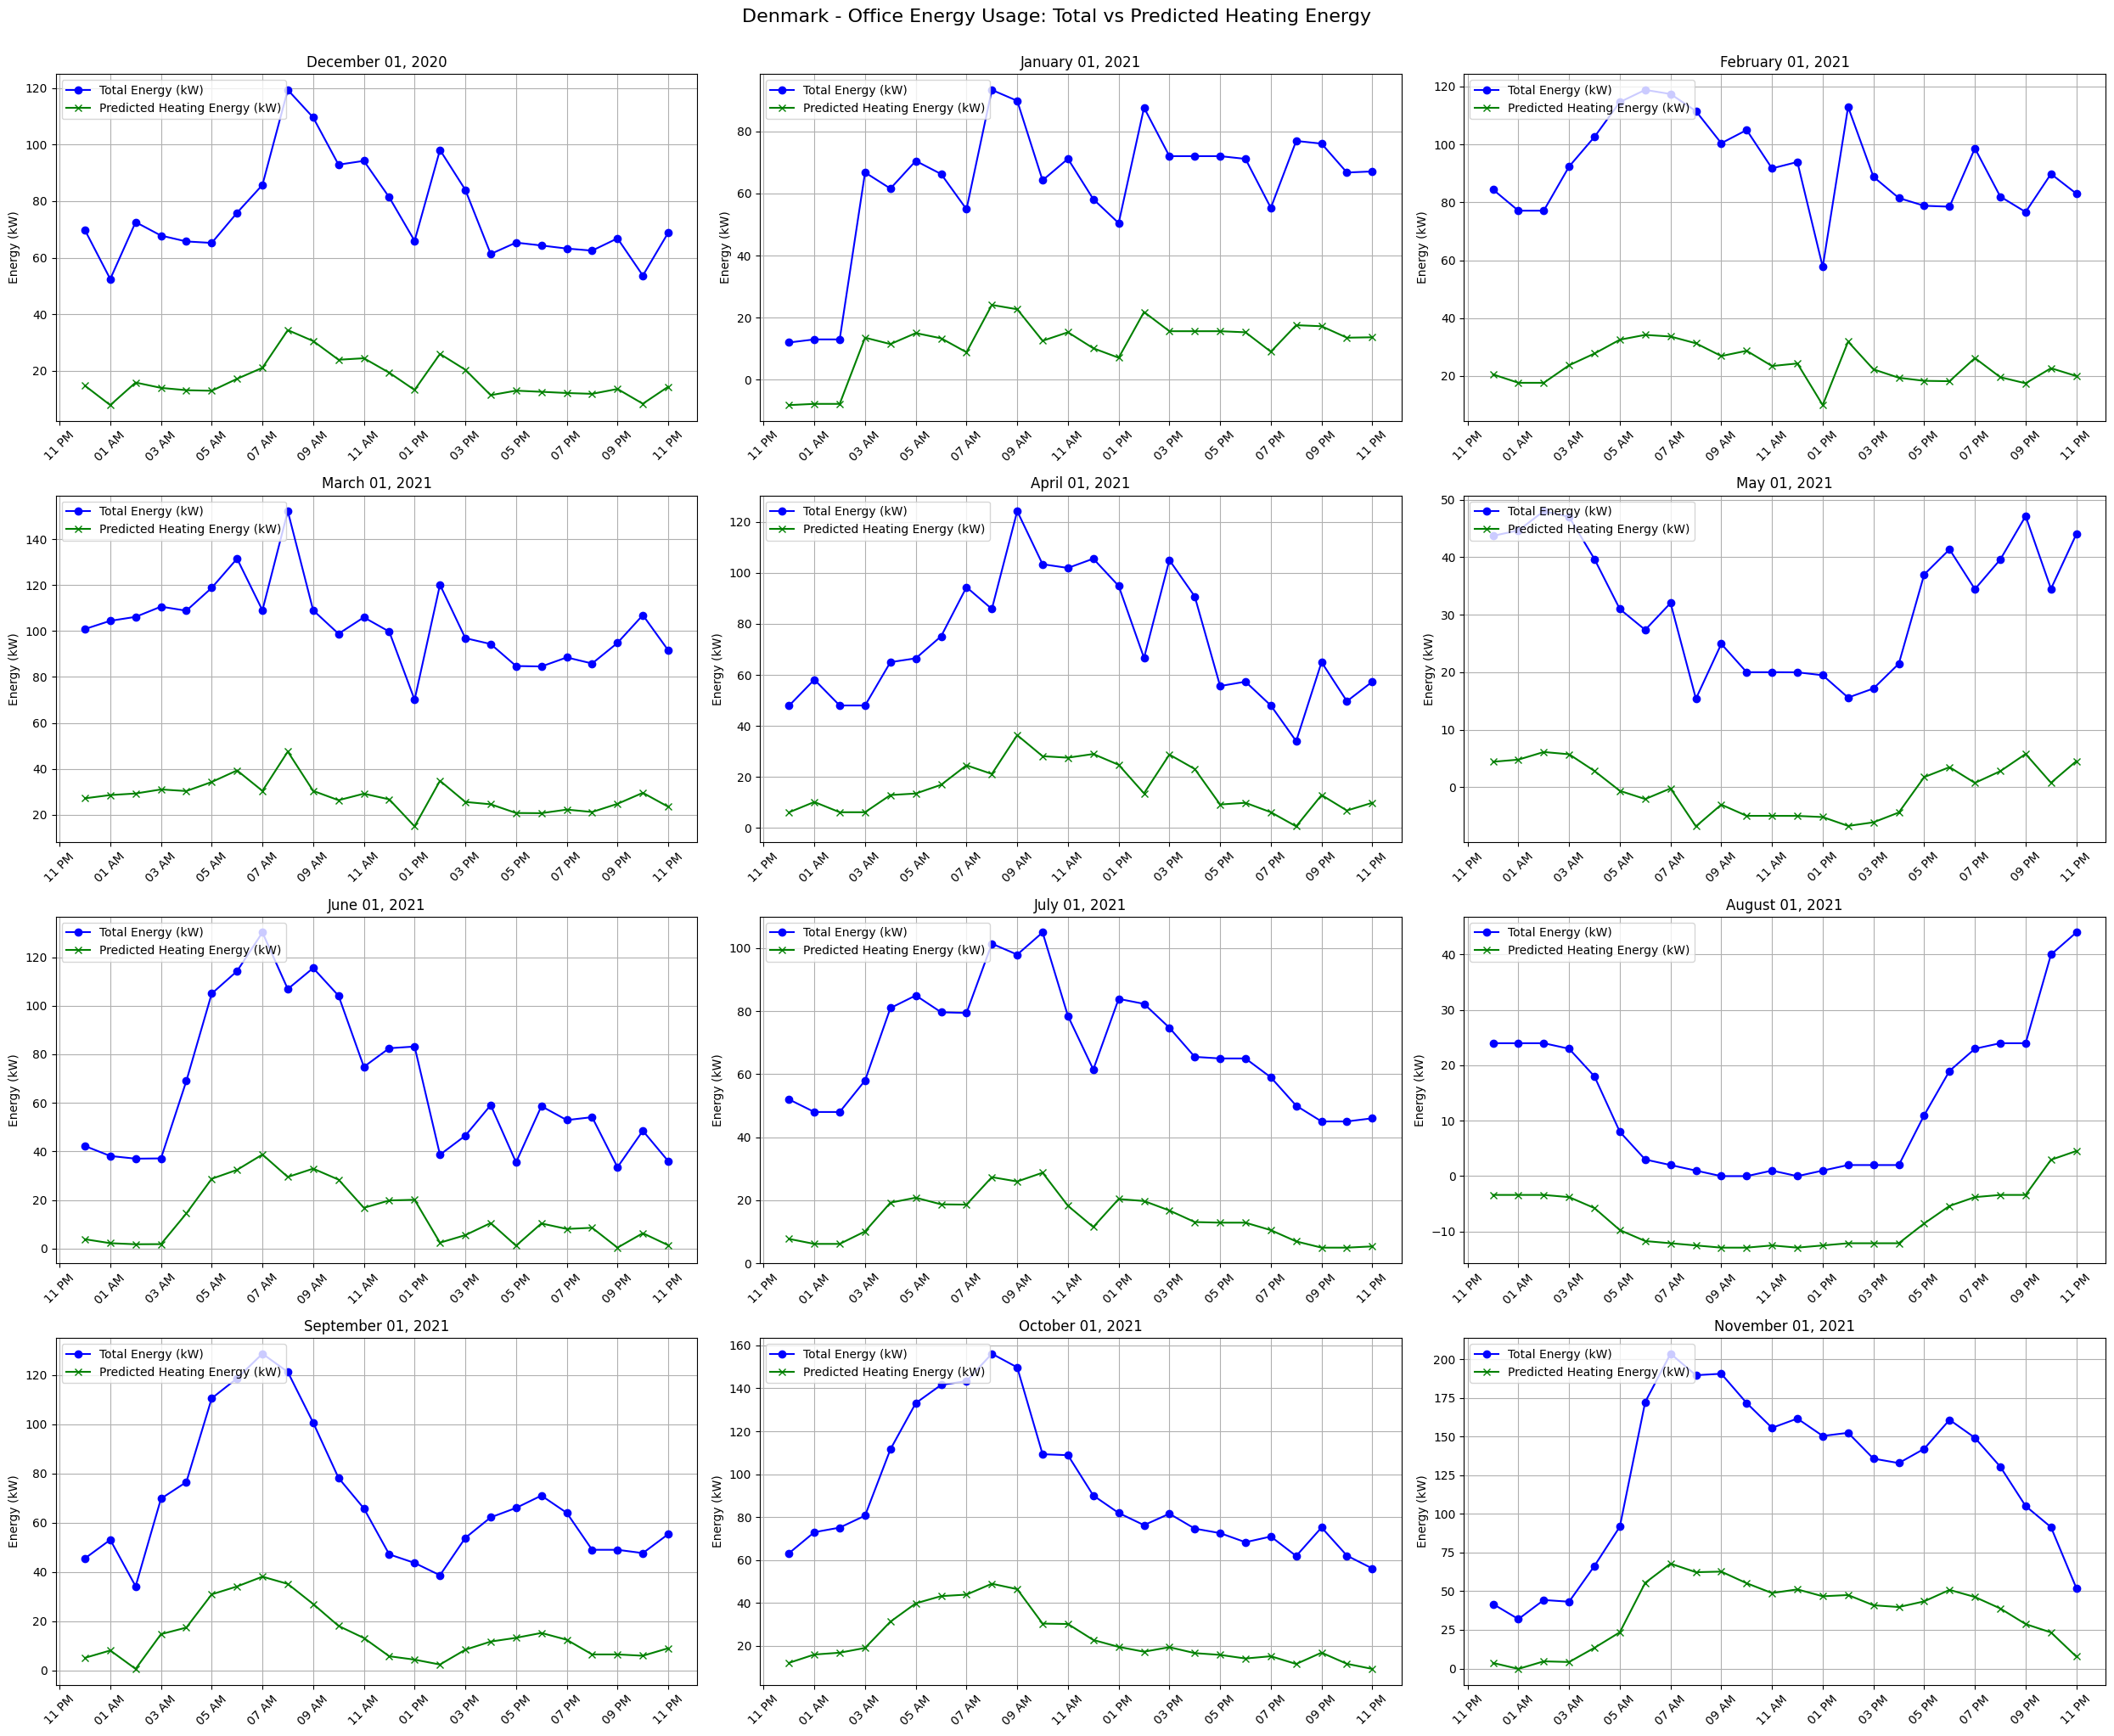

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h is your real building data DataFrame
df_1h = real_den

# Convert the 'timestamp' column to datetime
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    # Filter data for the specific date
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Plot the main meter energy (total energy)
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', color='blue', label='Total Energy (kW)')
    
    # Plot the predicted heating energy
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['Predicted Heating Energy (kW)'], marker='x', color='green', label='Predicted Heating Energy (kW)')
    
    # Set labels and title
    axes[i].set_ylabel('Energy (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Limit x-ticks to avoid overcrowding
    axes[i].xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))  # Format time as 12-hour clock

# Rotate x-axis labels for all subplots
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
fig.tight_layout()
plt.suptitle('Denmark - Office Energy Usage: Total vs Predicted Heating Energy', y=1.02, fontsize=16)
plt.show()


In [15]:
sum_total = real_den['main_meter(kW)'].sum()

In [16]:
sum_heating = real_den['Predicted Heating Energy (kW)'].sum()

In [17]:
sum_heating/sum_total

0.2250473024084187

In [18]:
sim_den['Heating end-use energy'].sum()/sim_den['Total end-use energy'].sum()

0.2423267229443468

C:\Users\lenovo\AppData\Local\Temp\ipykernel_35116\2854769950.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1h['timestamp'] = pd.date_range(start='2020-01-01 00:00', periods=len(df_1h), freq='H')


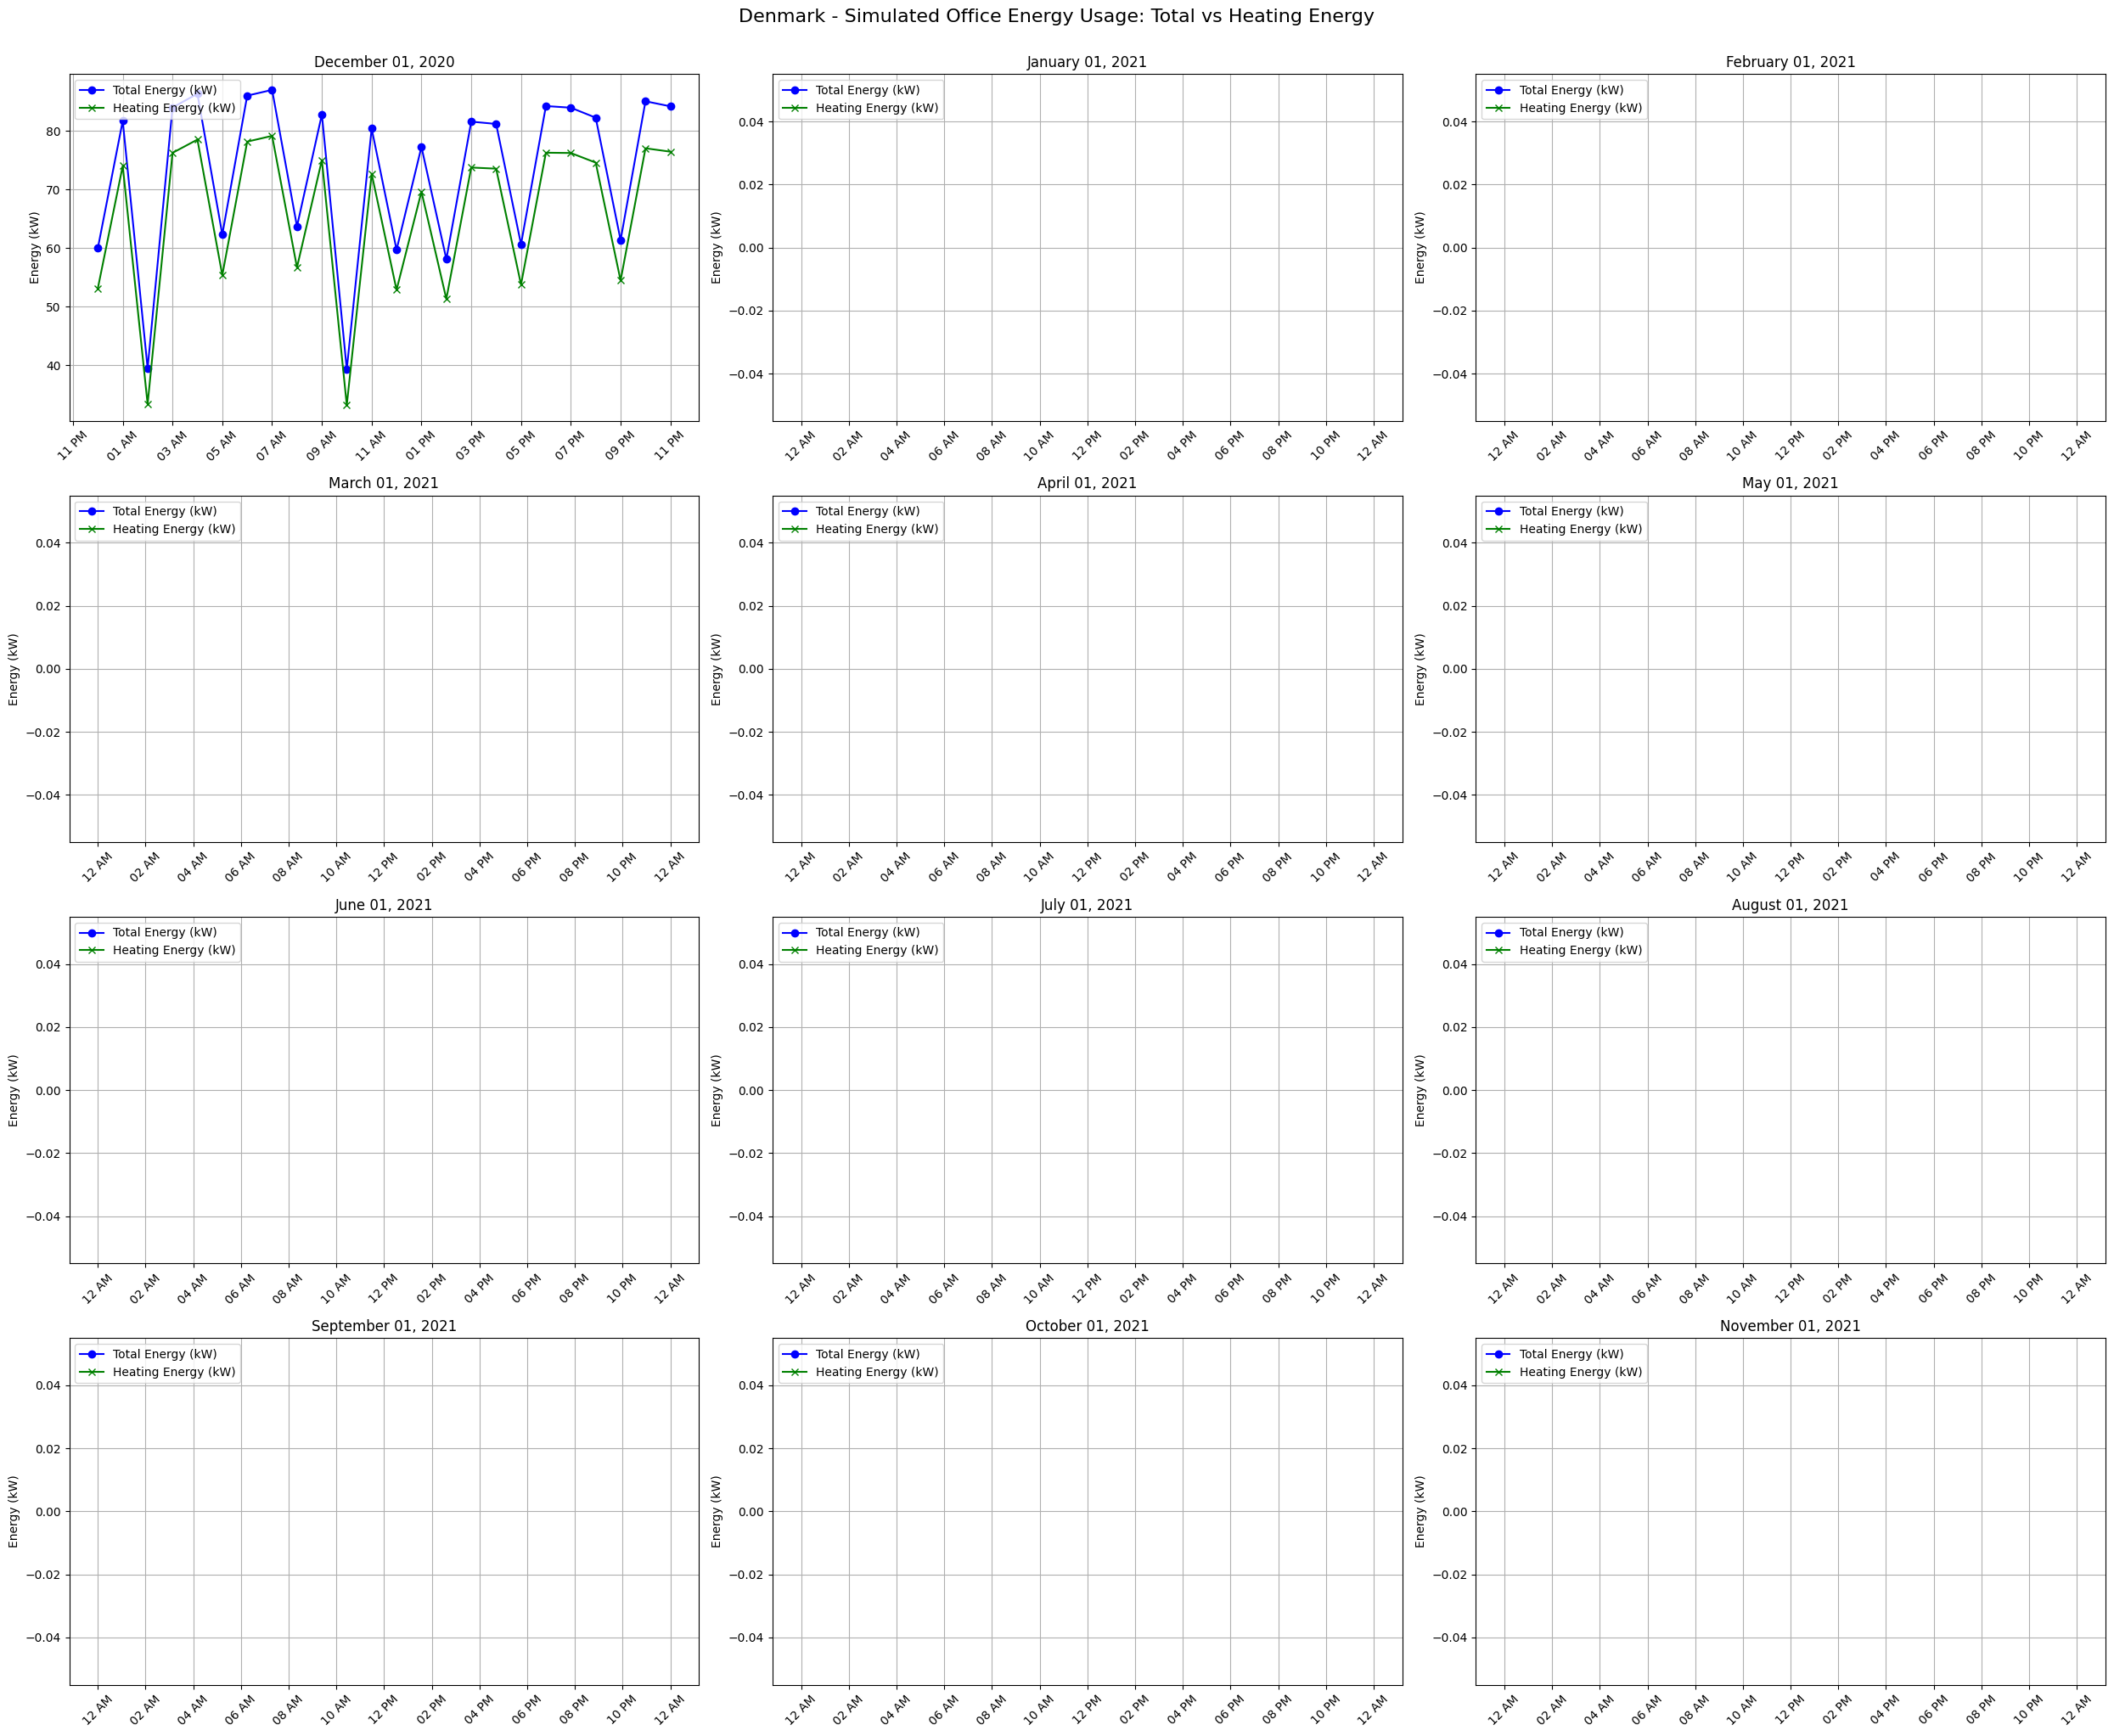

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h is your simulated building data DataFrame
df_1h = sim_den

# Simulate hourly time index assuming the data is in hourly intervals
# Assuming df_1h has 8760 entries corresponding to hourly data for a year
df_1h['timestamp'] = pd.date_range(start='2020-01-01 00:00', periods=len(df_1h), freq='H')

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    # Filter data for the specific date
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Plot the total end-use energy
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['Total end-use energy'], marker='o', color='blue', label='Total Energy (kW)')
    
    # Plot the heating end-use energy
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['Heating end-use energy'], marker='x', color='green', label='Heating Energy (kW)')
    
    # Set labels and title
    axes[i].set_ylabel('Energy (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Limit x-ticks to avoid overcrowding
    axes[i].xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))  # Format time as 12-hour clock

# Rotate x-axis labels for all subplots
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
fig.tight_layout()
plt.suptitle('Denmark - Simulated Office Energy Usage: Total vs Heating Energy', y=1.02, fontsize=16)
plt.show()
